# 예외처리

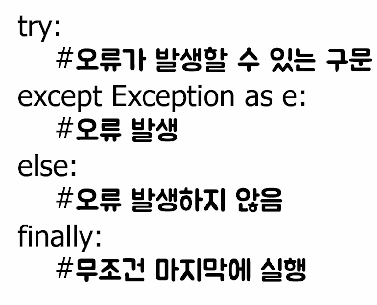

## try-except문

In [1]:
'''
try:
    ...
exceps [발생오류 [as 오류변수]]:
    ...
'''

'\ntry:\n    ...\nexceps [발생오류 [as 오류변수]]:\n    ...\n'

### 1. try-except만 쓰기

오류 종류 상관없이 오류가 발생하면 except 블록 수행

In [2]:
'''
try:
    ...
except:
    ...
'''

'\ntry:\n    ...\nexcept:\n    ...\n'

### 2. 발생 오류만 포함한 except문

In [3]:
'''
try:
    ...
except 발생오류:
    ...
'''

'\ntry:\n    ...\nexcept 발생오류:\n    ...\n'

### 3. 발생 오류와 오류 변수까지 포함한 except 문

오류 내용까지 알고 싶을 때 사용

In [4]:
'''
try:
    ...
except 발생오류 as 오류변수:
    ...
'''

'\ntry:\n    ...\nexcept 발생오류 as 오류변수:\n    ...\n'

In [5]:
try:
    4/0
except ZeroDivisionError as e:
    print(e)

division by zero


In [6]:
try:
    4/0
except ZeroDivisionError:
    print(ZeroDivisionError)

<class 'ZeroDivisionError'>


## try-finally문

finally 절은 예외 발생 여부에 상관없이 항상 수행

In [7]:
try:
    f = open('foo.txt','w')
finally:
    f.close()

예외 여부에 상관없이 finally를 항상 실행함

## 여러개의 오류 처리하기

In [8]:
'''
try:
    ...
except 발생오류1:
    ...
except 발생오류2:
    ...

'''

'\ntry:\n    ...\nexcept 발생오류1:\n    ...\nexcept 발생오류2:\n    ...\n\n'

In [9]:
try:
    a = [1,2]
    print(a[3]) # 인덱싱 오류
    4/0 # zero division 오류
except ZeroDivisionError:
    print('0으로 나눌 수 없습니다.')
except IndexError:
    print('인덱싱 할 수 없습니다')

인덱싱 할 수 없습니다


인덱싱 오류가 먼저 발생해서 IndexError 오류 발생

In [11]:
try:
    a=[1,2]
    print(a[3])
    4/0
except ZeroDivisionError as e:
    print(e)
except IndexError as e:
    print(e)

list index out of range


In [14]:
try:
    a=[1,2]
    print(a[3])
    4/0
except (ZeroDivisionError, IndexError) as e: # 오류 함께 처리
    print(e)

list index out of range


## try-else 문

else문 : 오류가 없을 경우에만 수행

In [15]:
'''
try:
    ...
except [발생오류 [as 오류변수]]:
    ...
else: # 오류가 없을 경우에만 수행
    ...
'''

'\ntry:\n    ...\nexcept [발생오류 [as 오류변수]]:\n    ...\nelse: # 오류가 없을 경우에만 수행\n    ...\n'

In [38]:
try:
    age=int(input('나이를 입력하세요:'))
except:
    print('입력이 정확하지 않습니다')
else:
    if age <= 18:
        print('미성년자 출입금지')
    else:
        print('웰컴')

웰컴


## 오류 회피하기

In [17]:
try:
    f = open('foo.txt','w')
except FileNotFoundError:
    pass

## 오류 일부러 발생시키기

`raise` 키워드 사용

In [19]:
class Bird:
    def fly(self):
        raise NotImplementedError # 꼭 작성해야 하는 부분이 구현되지 않았을 경우 오류 발생

class Eagle(Bird):
    pass

eagle = Eagle()
eagle.fly()

NotImplementedError: 

Bird 클래스를 상속받는 자식 클래스는 반드시 fly 함수를 구현하도록 만듦<br/>
Bird 클래스의 fly 함수는 오류가 발생하는 함수니까!!

In [22]:
class Bird:
    def fly(self):
        raise NotImplementedError

class Eagle(Bird):
    def fly(self): # 메서드 오버라이딩
        print('very fase')

eagle = Eagle()
eagle.fly()

very fase


## 예외 만들기

In [44]:
class MyError(Exception):
    pass

def say_nick(nick):
    if nick == '바보':
        raise MyError
    print(nick)

say_nick('천사')
say_nick('바보')

천사


MyError: 

In [45]:
try:
    say_nick('천사')
    say_nick('바보')
except MyError:
    print('허용되지 않는 별명임')


천사
허용되지 않는 별명임


In [46]:
try:
    say_nick('천사')
    say_nick('바보')
except MyError as e:
    print(e)

천사



오류 메시지 출력안됨!! -> 오류 클래스에 `__str__` 메서드 구현

In [48]:
class MyError(Exception):
    def __str__(self):
        return "허용되지 않는 별명이야"
try:
    say_nick('천사')
    say_nick('바보')
except MyError as e:
    print(e)

천사
허용되지 않는 별명이야
